In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [36]:
df=pd.DataFrame({'Gender':['Male','Female','Male','Female','Male','Female','Male','Female'],
                 'Age':[20,31,35,34,18,28,44,39]})
df

,Gender,Age
0,Male,20
1,Female,31
2,Male,35
3,Female,34
4,Male,18
5,Female,28
6,Male,44
7,Female,39


In [37]:
len(df[(df['Gender']=='Female') & (df['Age']>30)])

3

In [38]:
# B - Gender is Female  A - age>30
#P(A and B)
p_a_and_b=len(df[(df['Gender']=='Female') & (df['Age']>30)])/len(df)
p_a_and_b

0.375

In [42]:
#P(B)
p_b=len(df[df['Gender']=='Female'])/len(df)
p_b

0.5

In [43]:
#P(A)
p_a=len(df[df['Age']>30])/len(df)
p_a

0.625

In [44]:
#P(A|B)
p_a_given_b=p_a_and_b/p_b
p_a_given_b

0.75

In [50]:
#P(B|A)
p_b_given_a=p_a_and_b/p_a
p_b_given_a

0.6

In [45]:
#Group the DataFrame by Gender
g=df.groupby('Gender')

In [46]:
# count the no of people in each group who are over 30
over_30_count=g['Age'].apply(lambda x:(x>30).sum())
over_30_count

Gender
Female    3
Male      2
Name: Age, dtype: int64

In [47]:
#count the total no of people in each group
total_cnt=g['Age'].count()
total_cnt

Gender
Female    4
Male      4
Name: Age, dtype: int64

In [48]:
#calculate the conditional probability for each group
cond_prob=over_30_count/total_cnt
cond_prob

Gender
Female    0.75
Male      0.50
Name: Age, dtype: float64

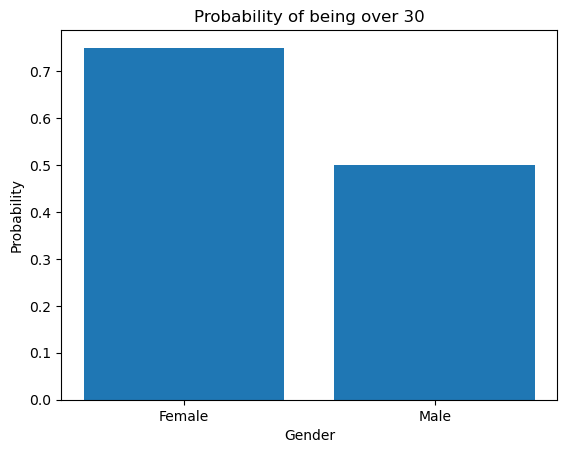

In [49]:
# create bar chart
plt.bar(cond_prob.index,cond_prob)
#Add labels and title
plt.xlabel("Gender")
plt.ylabel("Probability")
plt.title("Probability of being over 30")
#show the plot
plt.show()

## Example 2

In [52]:
from numpy import random
random.seed(0) # ensures that if we return the code, we will get the same random numbers

In [53]:
#total no of people in each group
totals={20:0,30:0,40:0,50:0,60:0,70:0}

In [55]:
purchases={20:0,30:0,40:0,50:0,60:0,70:0}
total_purchase=0

In [56]:
for _ in range(100000):
    ageDecade=random.choice([20,30,40,50,60,70])  # select one of these
    purchase_prob=float(ageDecade)/100.0 # lesser the age, lesser the probability
    totals[ageDecade]+=1
    
    
    if(random.random()<purchase_prob):
        total_purchase+=1
        purchases[ageDecade]+=1
print(totals)
print(purchases)
print(total_purchase)

{20: 16576, 30: 16619, 40: 16632, 50: 16805, 60: 16664, 70: 16704}
{20: 3392, 30: 4974, 40: 6670, 50: 8319, 60: 9944, 70: 11713}
45012


In [57]:
'''Conditional Probability
    First we calculate P(E|F), where E is "Purchase" and F is "you'r in 30's"        
        '''
PEF=float(purchases[30])/float(totals[30])
print("P(Purchase|30s):"+str(PEF))

P(Purchase|30s):0.29929598652145134


In [59]:
# P(F) is just probability of being 30 in this data set:
PF=float(totals[30])/100000
print("P(30s):"+str(PF))

P(30s):0.16619


In [60]:
'''Conditional Probability
    First we calculate P(E|F), where E is "Purchase" and F is "you'r in 70's"
        
        '''
PEF=float(purchases[70])/float(totals[70])
print("P(Purchase|70s):"+str(PEF))
# P(F) is just probability of being 70 in this data set:
PF=float(totals[70])/100000
print("P(70s):"+str(PF))

P(Purchase|70s):0.7012092911877394
P(70s):0.16704


In [61]:
# P(E) is just over all probability of buying something, regardless of age
PE=float(total_purchase)/100000
print("P(E):"+str(PE))

P(E):0.45012


In [63]:
print("P(30s,Purchase): " +str(float(purchases[30])/100000))

P(30s,Purchase): 0.04974


In [64]:
print("P(70s,Purchase): " +str(float(purchases[70])/100000))

P(70s,Purchase): 0.11713


In [65]:
'''Exercise: purchase probability does not vary with age, making E and F actually independent. then confirm
    that P(E|F) is about the same as P(E) showing that the conditional probability of Purchase for given age is not 
    any different than the probability of purchase regardless of age'''

'Exercise: purchase probability does not vary with age, making E and F actually independent. then confirm\n    that P(E|F) is about the same as P(E) showing that the conditional probability of Purchase for given age is not \n    any different than the probability of purchase regardless of age'

In [71]:
#total no of people in each group
totals={20:0,30:0,40:0,50:0,60:0,70:0}
purchases={20:0,30:0,40:0,50:0,60:0,70:0}
total_purchase=0
for _ in range(100000):
    ageDecade=random.choice([20,30,40,50,60,70])  # select one of these
    purchase_prob=float(ageDecade)/100.0 # lesser the age, lesser the probability
    totals[ageDecade]+=1    
    
    #if(random.random()<purchase_prob):
    total_purchase+=1
    purchases[ageDecade]+=1
print(totals)
print(purchases)
print(total_purchase)

{20: 16862, 30: 16729, 40: 16406, 50: 16866, 60: 16506, 70: 16631}
{20: 16862, 30: 16729, 40: 16406, 50: 16866, 60: 16506, 70: 16631}
100000


In [73]:
#total no of people in each group
totals={20:0,30:0,40:0,50:0,60:0,70:0}
purchases={20:0,30:0,40:0,50:0,60:0,70:0}
total_purchase=0
for _ in range(100000):
    ageDecade=random.choice([20,30,40,50,60,70])  # select one of these
    purchase_prob=float(ageDecade)/100.0 # lesser the age, lesser the probability
    totals[ageDecade]+=1    
    
    if(random.random()<0.4):
        total_purchase+=1
        purchases[ageDecade]+=1
print(totals)
print(purchases)
print(total_purchase)

{20: 16697, 30: 16482, 40: 16861, 50: 16691, 60: 16740, 70: 16529}
{20: 6631, 30: 6577, 40: 6719, 50: 6569, 60: 6719, 70: 6678}
39893


In [74]:
'''Conditional Probability
    First we calculate P(E|F), where E is "Purchase" and F is "you'r in 30's"        
        '''
PEF=float(purchases[30])/float(totals[30])
print("P(Purchase|30s):"+str(PEF))
# P(F) is just probability of being 30 in this data set:
PF=float(totals[30])/100000
print("P(30s):"+str(PF))

P(Purchase|30s):0.39904137847348625
P(30s):0.16482
